In [1]:
import numpy as np
import matplotlib.pyplot as plt

|material | width |
|:----:|:----:|
|Quartz | 3mm |
|HfO2 | 25.71nm |
|Ag-Ge | 11.74nm |
|SiO2 | 107.1nm |
|HfO2 | 14.59nm |
|Ag-Ge | 11.91nm |
|SiO2 | 130.66nm |
|Al2O3 | 9.74nm |
|HfO2  | 78.12nm |
|Al2O3 | 125.49nm |
|HfO2 | 58.13nm |
|Al2O3 | 64.22nm |

In [2]:
def n_al2o3(wl):
    nsq = 1 + 1.4313493*wl**2/(wl**2-0.0726631**2) + 0.65054713*wl**2/(wl**2-0.1193242**2) + 5.3414021*wl**2/(wl**2-18.028251**2)
    return np.sqrt(nsq)
def n_sio2(wl):
    nsq = 1 + 0.6961663*wl**2/(wl**2-0.0684043**2) + 0.4079426*wl**2/(wl**2-0.1162414**2) + 0.8974794*wl**2/(wl**2-9.896161**2)
    return np.sqrt(nsq)

C:\Users\chihw\AppData\Local\Temp\ipykernel_24380\892267307.py:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(nsq)


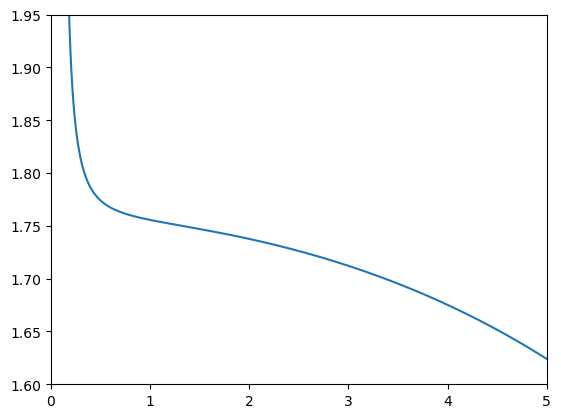

In [3]:
wl = np.linspace(0.1,5,500)
plt.ylim(1.6,1.95)
plt.xlim(0,5)
plt.plot(wl, n_al2o3(wl))

In [4]:
def n_hfo2(wl):
    return 1.875 + 6.28e-3/(wl**2) + 5.8e-4/(wl**4)

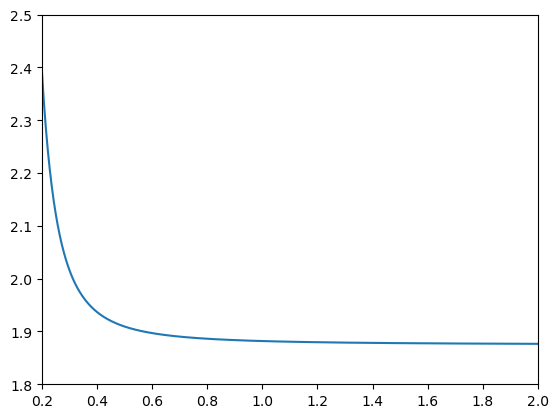

In [5]:
wl = np.linspace(0.2,2,500)
plt.ylim(1.8,2.5)
plt.xlim(0.2,2)
plt.plot(wl, n_hfo2(wl))

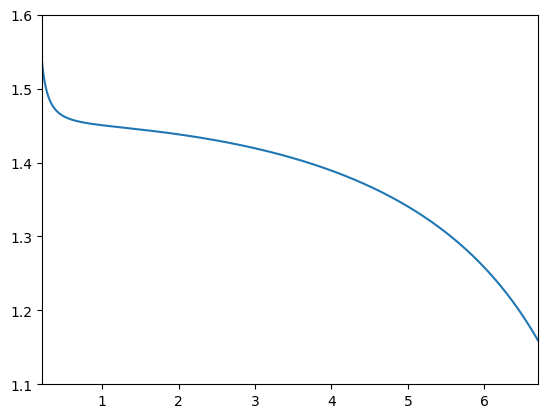

In [6]:
wl = np.linspace(0.21,6.7,500)
plt.ylim(1.1,1.6)
plt.xlim(0.21,6.7)
plt.plot(wl, n_sio2(wl))

Define a function that can return the transmission and reflection coefficient after input the index array and thickness array.

In [7]:
def Tr_M(nl, dl, k): #nl is index array, dl is thickness array, k is the wave vector of incoming wave.
    TI = np.array([[(nl[0]+1)/(2*nl[0]), (nl[0]-1)/(2*nl[0])], [(nl[0]-1)/(2*nl[0]), (nl[0]+1)/(2*nl[0])]])
    TD = np.array([[np.exp(1j*nl[0]*k*dl[0]),0],[0,np.exp(-1j*nl[0]*k*dl[0])]])
    TM = TD @ TI
    for i, n in enumerate(nl):
        if (i+1) < len(nl):            
            n1 = n
            n2 = nl[i+1]
            d = dl[i+1]
            TI = np.array([[(n2+n1)/(2*n2), (n2-n1)/(2*n2)], [(n2-n1)/(2*n2), (n2+n1)/(2*n2)]])
            TD = np.array([[np.exp(1j*n2*k*d),0],[0,np.exp(-1j*n2*k*d)]])
            TM = (TD @ TI) @ TM
    n1 = nl[-1]
    n2 = 1
    TI = np.array([[(n2+n1)/(2*n2), (n2-n1)/(2*n2)], [(n2-n1)/(2*n2), (n2+n1)/(2*n2)]])
    TM = TI @ TM
    return -TM[1,0]/TM[1,1], TM[0,0] - TM[0,1]*TM[1,0]/TM[1,1]

In [8]:
l0 = 1.55
nl = [3,1,3,1,3,1,3]
dl = [l0/4/3,l0/4,l0/4/3,l0/4,l0/4/3,l0/4,l0/4/3]

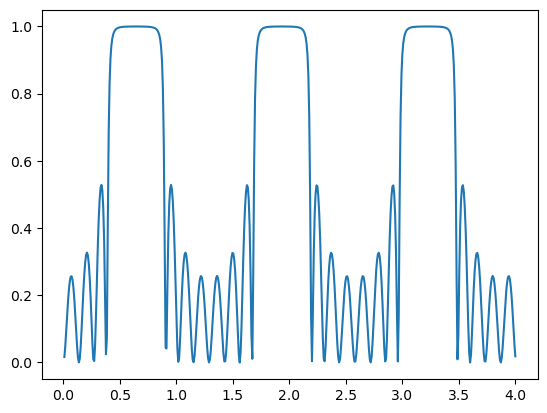

In [9]:
fl = np.linspace(0.01,4,500)
Tcl = []
Rcl = []
for f in fl:
    Rc, Tc = Tr_M(nl,dl,2*np.pi*f)
    Tcl.append(np.abs(Tc)**2)
    Rcl.append(np.abs(Rc)**2)
#plt.plot(fl,Tcl)
plt.plot(fl,Rcl)

|material | width |
|:----:|:----:|
|Quartz | 3mm |
|HfO2 | 25.71nm |
|Ag-Ge | 11.74nm |
|SiO2 | 107.1nm |
|HfO2 | 14.59nm |
|Ag-Ge | 11.91nm |
|SiO2 | 130.66nm |
|Al2O3 | 9.74nm |
|HfO2  | 78.12nm |
|Al2O3 | 125.49nm |
|HfO2 | 58.13nm |
|Al2O3 | 64.22nm |

In [11]:
dl_ml = np.array([0.02571,0.01174,0.1071,0.01459,0.01191,0.13066,0.00974,0.07812,0.12549,0.05813,0.06422])

Define a function specifically to deal with the original multilayer problem and can output the transmission and reflectance of the wave with some particular wavelength.

In [12]:
#wl is the wavelength of the incoming wave, n and k are the real and imaginary part of the index of the metal 
def TrM_ml(wl, n, k): 
    n1 = n_sio2(wl)
    n2 = n_hfo2(wl)
    n3 = n_al2o3(wl)
    n4 = n + 1j*k
    nl_ml = np.array([n2,n4,n1,n2,n4,n1,n3,n2,n3,n2,n3])
    Rc, Tc = Tr_M(nl_ml, dl_ml, 2*np.pi/wl)
    return np.abs(Rc)**2, np.abs(Tc)**2

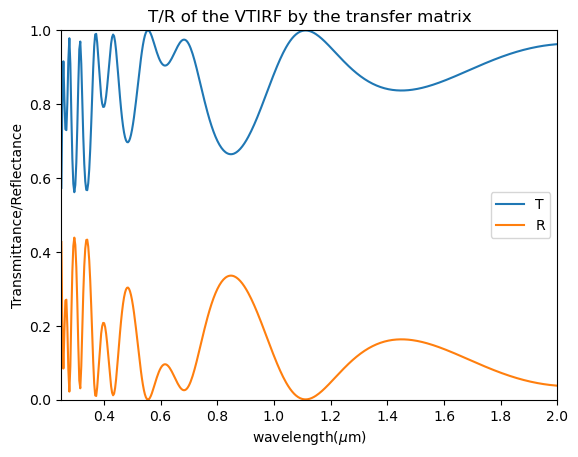

In [13]:
wll = np.linspace(0.25,2,500)
Tcl = []
Rcl = []
for wl in wll:
    Rc, Tc = TrM_ml(wl, 1, 0)
    Tcl.append(Tc)
    Rcl.append(Rc)
#plt.plot(fl,Tcl)
plt.xlim(0.25,2)
plt.ylim(0,1)
plt.xlabel("wavelength($\mu$m)")
plt.ylabel("Transmittance/Reflectance")
plt.plot(wll,Tcl, label='T')
plt.plot(wll,Rcl, label='R')
plt.title("T/R of the VTIRF by the transfer matrix")
plt.legend()
#plt.savefig("T_R_mlayer_v2.png")

Read the table of Ag's index from the file 'Ag.txt' and  store the wavenlength array to wl_ag, the real part of index to n_ag and  the imaginary part to k_ag.

In [14]:
from csv import DictReader

wl_ag = []
n_ag = []
k_ag = []
with open('Ag.txt', 'r') as csv_file:
    reader = DictReader(csv_file, delimiter='\t', fieldnames=['wavelength', 'n', 'k'])
    for i, line in enumerate(reader):
        if i != 0:
            wl_ag.append(float(line['wavelength']))
            n_ag.append(float(line['n']))
            k_ag.append(float(line['k']))
wl_ag = np.array(wl_ag)
n_ag = np.array(n_ag)
k_ag = np.array(k_ag)

In [15]:
dl_ml_v1 = np.array([0.01174,0.1071,0.01459,0.01191])
dl_ml_v2 = np.array([0.13066,0.00974,0.07812,0.12549,0.05813,0.06422])
dl_ml_v3 = np.array([0.01174,0.1071,0.01191])
dl_ml_v4 = np.array([0.01174*2,0.1071])

In [18]:
a=[1,2,3,4,5,6,7]
a[2:5]

[3, 4, 5]

In [19]:
wll = wl_ag/1000 #convert the wavelength to the micro meter scale.
Tcl = []
Rcl = []
for i, wl in enumerate(wll):
    n1 = n_sio2(wl)
    n2 = n_hfo2(wl)
    n3 = n_al2o3(wl)
    n4 = n_ag[i] + 1j*k_ag[i]
    nl_ml = np.array([n2,n4,n1,n2,n4,n1,n3,n2,n3,n2,n3])
    dl_ml = np.array([0.02571,0.01174,0.1071,0.01459,0.01191,0.13066,0.00974,0.07812,0.12549,0.05813,0.06422])
    nl_ml_back = np.array([n1,n3,n2,n3,n2,n3])
    nl_ml_v1 = np.array([n4,n1,n2,n4])
    nl_ml_v3 = np.array([n4,n1,n4])
    nl_ml_v4 = np.array([n4,n1])
    dl_ml_t = dl_ml[5:]
    nl_ml_t = nl_ml[5:]
    #nl_ml = np.array([n4,1,1,n4])
    Rc, Tc = Tr_M(nl_ml_v1, dl_ml[1:5], 2*np.pi/wl)
    #Rc, Tc = TrM_ml(wl, n_ag[i], k_ag[i])
    Tcl.append(np.abs(Tc)**2)
    Rcl.append(np.abs(Rc)**2)
Tcl_back = Tcl
Rcl_back = Rcl

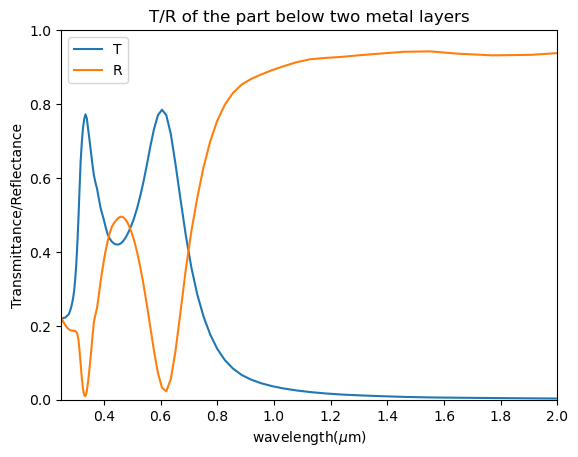

In [20]:
plt.xlim(0.25,2)
plt.ylim(0,1)
plt.plot(wll, Tcl_back, label = 'T')
plt.plot(wll, Rcl_back, label = 'R')
plt.xlabel("wavelength($\mu$m)")
plt.ylabel("Transmittance/Reflectance")
plt.title("T/R of the part below two metal layers")
plt.legend()
#plt.savefig("T_R_mlayer_ag_back.png")

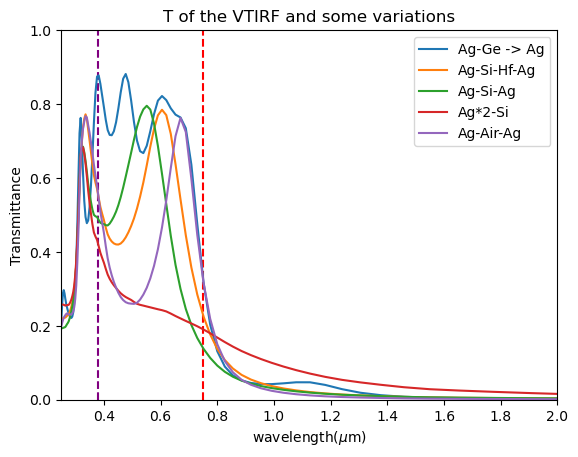

In [71]:
plt.xlim(0.25,2)
plt.ylim(0,1)
plt.vlines(x = 0.38, ymin = 0, ymax = 1,
           colors = 'purple',linestyle='dashed')
plt.vlines(x = 0.75, ymin = 0, ymax = 1,
           colors = 'red',linestyle='dashed')
plt.plot(wll,Tcl_orig, label = 'Ag-Ge -> Ag')
plt.plot(wll,Tcl_v1, label = 'Ag-Si-Hf-Ag')
plt.plot(wll,Tcl_v3, label = 'Ag-Si-Ag')
plt.plot(wll,Tcl_v4, label = 'Ag*2-Si')
plt.plot(wll,Tcl_v5, label = 'Ag-Air-Ag')
plt.xlabel("wavelength($\mu$m)")
plt.ylabel("Transmittance")
plt.title("T of the VTIRF and some variations")
plt.legend()
plt.savefig("T_mlayer_ag_mix.png")

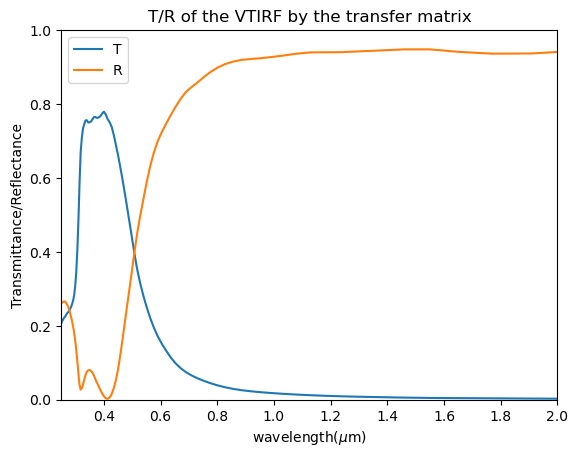

In [34]:
wll = wl_ag/1000
Tcl = []
Rcl = []
for i, wl in enumerate(wll):
    Rc, Tc = TrM_ml(wl, n_ag[i], k_ag[i])
    Tcl.append(Tc)
    Rcl.append(Rc)
#plt.plot(fl,Tcl)
plt.xlim(0.25,2)
plt.ylim(0,1)
plt.xlabel("wavelength($\mu$m)")
plt.ylabel("Transmittance/Reflectance")
plt.plot(wll,Tcl, label='T')
plt.plot(wll,Rcl, label='R')
plt.title("T/R of the VTIRF by the transfer matrix")
plt.legend()
plt.savefig("T_R_mlayer_ag_v4.png")

In [52]:
wl_ge = []
n_ge = []
k_ge = []
with open('Ge.txt', 'r') as csv_file:
    reader = DictReader(csv_file, delimiter='\t', fieldnames=['wavelength', 'n', 'k'])
    for i, line in enumerate(reader):
        if i != 0:
            wl_ge.append(float(line['wavelength']))
            n_ge.append(float(line['n']))
            k_ge.append(float(line['k']))
wl_ge = np.array(wl_ge)
n_ge = np.array(n_ge)
k_ge = np.array(k_ge)

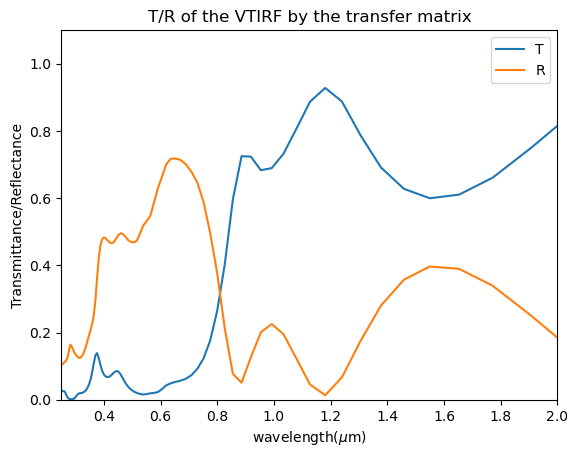

In [53]:
wll = wl_ge/1000
Tcl = []
Rcl = []
for i, wl in enumerate(wll):
    Rc, Tc = TrM_ml(wl, n_ge[i], k_ge[i])
    Tcl.append(Tc)
    Rcl.append(Rc)
#plt.plot(fl,Tcl)
plt.xlim(0.25,2)
plt.ylim(0,1.1)
plt.xlabel("wavelength($\mu$m)")
plt.ylabel("Transmittance/Reflectance")
plt.plot(wll,Tcl, label='T')
plt.plot(wll,Rcl, label='R')
plt.title("T/R of the VTIRF by the transfer matrix")
plt.legend()
plt.savefig("T_R_mlayer_ge.png")